In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('Cleaned Movies data.csv')

In [7]:
data.head()

,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Release_Year
0,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021
1,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022
2,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122.0,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,2022
3,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076.0,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,2021
4,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793.0,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,2021


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              9827 non-null   object 
 1   Overview           9827 non-null   object 
 2   Popularity         9827 non-null   float64
 3   Vote_Count         9827 non-null   float64
 4   Vote_Average       9827 non-null   float64
 5   Original_Language  9827 non-null   object 
 6   Genre              9827 non-null   object 
 7   Poster_Url         9827 non-null   object 
 8   Release_Year       9827 non-null   int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 691.1+ KB


In [9]:
data.isna().sum()

Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
Release_Year         0
dtype: int64

In [15]:
data.dtypes

Title                 object
Overview              object
Popularity           float64
Vote_Count           float64
Vote_Average         float64
Original_Language     object
Genre                 object
Poster_Url            object
Release_Year           int64
dtype: object

In [2]:
data.describes()

In [6]:
data.columns

Index(['Title', 'Overview', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Original_Language', 'Genre', 'Poster_Url', 'Release_Year'],
      dtype='object')

In [7]:
data.dtypes

Title                 object
Overview              object
Popularity           float64
Vote_Count           float64
Vote_Average         float64
Original_Language     object
Genre                 object
Poster_Url            object
Release_Year           int64
dtype: object

In [8]:
cols_to_drop = ['Overview', 'Original_Language', 'Poster_Url']
data.drop(columns=cols_to_drop, inplace=True)

In [9]:
data.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940.0,8.3,"Action, Adventure, Science Fiction",2021
1,The Batman,3827.658,1151.0,8.1,"Crime, Mystery, Thriller",2022
2,No Exit,2618.087,122.0,6.3,Thriller,2022
3,Encanto,2402.201,5076.0,7.7,"Animation, Comedy, Family, Fantasy",2021
4,The King's Man,1895.511,1793.0,7.0,"Action, Adventure, Thriller, War",2021


Finding out the "Average Count"), categorize them into 4 labels as Pupular, average, below_average, not popular

In [13]:
def categorize_col(data, col, labels):

    edges = [data[col].describe()['min'],
             data[col].describe()['25%'],
             data[col].describe()['50%'],
             data[col].describe()['75%'],
             data[col].describe()['max']]
    data[col] = pd.cut(data[col], edges,  labels = labels, duplicates = 'drop')
    return data

In [10]:
def random_var(data, col, labels):
    edges = [data[col].describe()['min'],
             data[col].describe()['25%'],
             data[col].describe()['50%'],
             data[col].describe()['75%'],
             data[col].describe()['max']]
    data[col] = pd.cut(data[col], edges, labels=labels, duplicates = 'drop')
    return data

In [11]:
data.head()

,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Release_Year
0,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021
1,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022
2,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122.0,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,2022
3,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076.0,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,2021
4,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793.0,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,2021


In [14]:
labels = ['Not_popular', 'Below_average', 'Average', 'Popular']

categorize_col(data,'Vote_Average',labels)

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940.0,Popular,"Action, Adventure, Science Fiction",2021
1,The Batman,3827.658,1151.0,Popular,"Crime, Mystery, Thriller",2022
2,No Exit,2618.087,122.0,Below_average,Thriller,2022
3,Encanto,2402.201,5076.0,Popular,"Animation, Comedy, Family, Fantasy",2021
4,The King's Man,1895.511,1793.0,Average,"Action, Adventure, Thriller, War",2021
...,...,...,...,...,...,...
9822,Badlands,13.357,896.0,Popular,"Drama, Crime",1973
9823,Violent Delights,13.356,8.0,Not_popular,Horror,2020
9824,The Offering,13.355,94.0,Not_popular,"Mystery, Thriller, Horror",2016
9825,The United States vs. Billie Holiday,13.354,152.0,Average,"Music, Drama, History",2021


In [15]:
data['Vote_Average'].value_counts()

Vote_Average
Not_popular      2467
Popular          2450
Average          2411
Below_average    2399
Name: count, dtype: int64

In [18]:
data.dropna(inplace = True)
data.isna().sum()

Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
Release_Year    0
dtype: int64

In [19]:
data.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940.0,Popular,"Action, Adventure, Science Fiction",2021
1,The Batman,3827.658,1151.0,Popular,"Crime, Mystery, Thriller",2022
2,No Exit,2618.087,122.0,Below_average,Thriller,2022
3,Encanto,2402.201,5076.0,Popular,"Animation, Comedy, Family, Fantasy",2021
4,The King's Man,1895.511,1793.0,Average,"Action, Adventure, Thriller, War",2021


we would split Genres into Lists and then Explode our dataframe to have only one genre per row fro each movie

In [20]:
data['Genre'] = data['Genre'].str.split(', ')

data = data.explode('Genre').reset_index(drop = True)

In [22]:
data.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940.0,Popular,Action,2021
1,Spider-Man: No Way Home,5083.954,8940.0,Popular,Adventure,2021
2,Spider-Man: No Way Home,5083.954,8940.0,Popular,Science Fiction,2021
3,The Batman,3827.658,1151.0,Popular,Crime,2022
4,The Batman,3827.658,1151.0,Popular,Mystery,2022


In [26]:
data['Genre'] = data['Genre'].astype('category')

data['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'Unknown', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Title         25552 non-null  object  
 1   Popularity    25552 non-null  float64 
 2   Vote_Count    25552 non-null  float64 
 3   Vote_Average  25552 non-null  category
 4   Genre         25552 non-null  category
 5   Release_Year  25552 non-null  int64   
dtypes: category(2), float64(2), int64(1), object(1)
memory usage: 849.4+ KB


In [29]:
data.nunique()     #Total unique values in dataset

Title           9415
Popularity      8087
Vote_Count      3265
Vote_Average       4
Genre             20
Release_Year     100
dtype: int64

# DATA VISULAIZATION

In [32]:
sns.set_style('whitegrid')

In [31]:
data['Genre'].describe()

count     25552
unique       20
top       Drama
freq       3715
Name: Genre, dtype: object

# Question 1 : What is the most frequent Genre of movies released on netflix ?

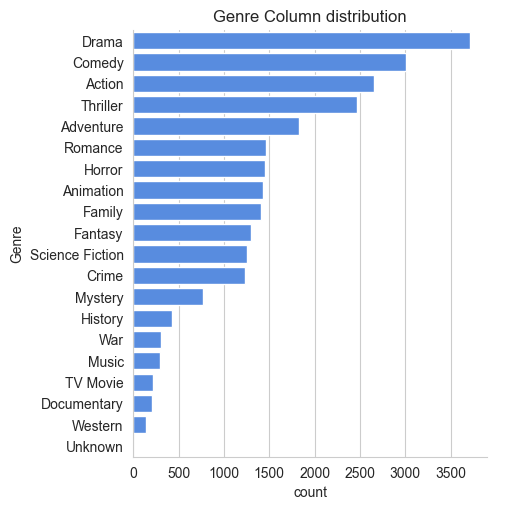

In [35]:
sns.catplot(y='Genre', data=data, kind= 'count',
             order = data['Genre'].value_counts().index,
             color = '#4287f5')
plt.title('Genre Column distribution')
plt.show()

# Question 2: Which has the highest vote in 'Average_vote' column ?**

In [39]:
data.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940.0,Popular,Action,2021
1,Spider-Man: No Way Home,5083.954,8940.0,Popular,Adventure,2021
2,Spider-Man: No Way Home,5083.954,8940.0,Popular,Science Fiction,2021
3,The Batman,3827.658,1151.0,Popular,Crime,2022
4,The Batman,3827.658,1151.0,Popular,Mystery,2022


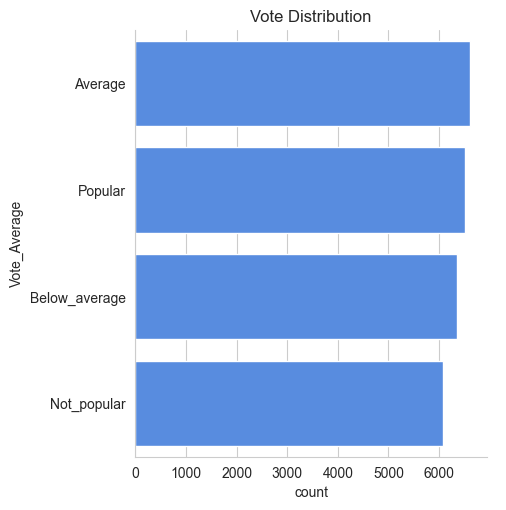

In [45]:
sns.catplot(y='Vote_Average', data=data, kind='count',
            order = data['Vote_Average'].value_counts().index,
            color = '#4287f5')
plt.title("Vote Distribution")
plt.show()

# Question 3 : What movie got the highest popularity & in what genre ?

In [48]:
data[data['Popularity'] == data['Popularity'].max()]

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940.0,Popular,Action,2021
1,Spider-Man: No Way Home,5083.954,8940.0,Popular,Adventure,2021
2,Spider-Man: No Way Home,5083.954,8940.0,Popular,Science Fiction,2021


# Question 4 : What movie got the Lowest popularity & in what genre ?

In [49]:
data[data['Popularity'] == data['Popularity'].min()]

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
25546,The United States vs. Billie Holiday,13.354,152.0,Average,Music,2021
25547,The United States vs. Billie Holiday,13.354,152.0,Average,Drama,2021
25548,The United States vs. Billie Holiday,13.354,152.0,Average,History,2021
25549,Threads,13.354,186.0,Popular,War,1984
25550,Threads,13.354,186.0,Popular,Drama,1984
25551,Threads,13.354,186.0,Popular,Science Fiction,1984


# Question 5 : Which Year has the Most Filmed Movies ?

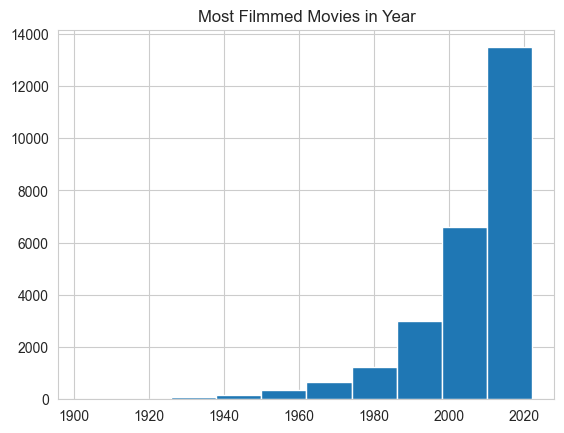

In [55]:
data['Release_Year'].hist()
plt.title("Most Filmmed Movies in Year")
plt.show()

# SUMMARY OF PROJECT

Q1: What is the most frequent genre in the dataset? 
-> Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among
than 18.5% of movies popularities.

Q2: What genres has highest votes? 
-> we have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the highest popularity among fans by being having more
and Sience Fiction.

Q3: What movie got the highest popularity? what's its genre? Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of Action, Adventure
science fiction.

Q4: What movie got the lowest popularity? what's its genre? The united states, thread' has the highest lowest rate in our dataset and it has genres of music, drama, 'war', 'sci-


Q4: Which year has the most filmmed movies? year 2020 has the highest filmming rate in our dataset.